In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


beta 1.0 nrand 1.0

Filename: 60

In [2]:
Catalog60 = np.loadtxt("./volume_and_excentricity/60.vae", delimiter=",")
R60 = Catalog60[:,5]

Catalog78 = np.loadtxt("./volume_and_excentricity/78.vae", delimiter=",")
R78 = Catalog78[:,5]

In [3]:
PositionBigVoid_1 = np.where(R60 == R60.max())[0][0]
PositionBigVoid_2 = np.where(R78 == R78.max())[0][0]


BigVoidCat60 = Catalog60[ np.where(Catalog60[:,5] == Catalog60[:,5].max()) ]
BigVoidCat78 = Catalog78[ np.where(Catalog78[:,5] == Catalog78[:,5].max()) ]

Big Void ID:

In [4]:
ML_ID_BigVoid60 = int(Catalog60[PositionBigVoid_1][0])
ML_ID_BigVoid78 = int(Catalog78[PositionBigVoid_2][0])

In [5]:
MasterList60 = np.loadtxt("masterlists/60.mls")
index = np.where(MasterList60[:,0] == ML_ID_BigVoid60)
BigVoidML60 = MasterList60[index]
x1 = BigVoidML60[:,1]
y1 = BigVoidML60[:,2]
z1 = BigVoidML60[:,3]

MasterList78 = np.loadtxt("masterlists/78.mls")
index = np.where(MasterList78[:,0] == ML_ID_BigVoid78)
BigVoidML78 = MasterList78[index]
x2 = BigVoidML78[:,1]
y2 = BigVoidML78[:,2]
z2 = BigVoidML78[:,3]

In [6]:
VoidID_1, x01, y01, z01, Npart_1, R_1, a_1, b_1, c_1, a1_1, a2_1, a3_1, b1_1, b2_1, b3_1, c1_1, c2_1, c3_1 = np.ndarray.tolist(BigVoidCat60[0])
VoidID_2, x02, y02, z02, Npart_2, R_2, a_2, b_2, c_2, a1_2, a2_2, a3_2, b1_2, b2_2, b3_2, c1_2, c2_2, c3_2 = np.ndarray.tolist(BigVoidCat78[0])

In [7]:
print(x01, y01, z01)
print(x02, y02, z02)

261.9507426653045 -195.70048563683144 14.178888851969432
272.1143010636425 -222.26057472918313 37.50858733162761


In [8]:
def ellipse_wireframe_xyz(x0,y0,z0, a,b,c, a1,a2,a3, b1,b2,b3, c1,c2,c3):
    # Generate the wireframe using angles
    u_phi = np.linspace(0, 2 * np.pi, 100)
    v_theta = np.linspace(0, np.pi, 100)

    # Cartesian coordinates that correspond to the spherical angles:
    # (this is the equation of an ellipsoid):
    xw = a * np.outer(np.cos(u_phi), np.sin(v_theta))
    yw = b * np.outer(np.sin(u_phi), np.sin(v_theta))
    zw = c * np.outer(np.ones_like(u_phi), np.cos(v_theta))

    Xt = np.zeros_like(xw)
    Yt = np.zeros_like(yw)
    Zt = np.zeros_like(zw)

    # Rotate the wireframe
    for i in range(100):
        for j in range(100):
            Xt[i,j] = a1*xw[i,j] + b1*yw[i,j] + c1*zw[i,j] + x0
            Yt[i,j] = a2*xw[i,j] + b2*yw[i,j] + c2*zw[i,j] + y0
            Zt[i,j] = a3*xw[i,j] + b3*yw[i,j] + c3*zw[i,j] + z0
    
    return Xt, Yt, Zt

In [9]:
Xt1, Yt1, Zt1 = ellipse_wireframe_xyz(x01, y01, z01, a_1, b_1, c_1, 
                                      a1_1, a2_1, a3_1, 
                                      b1_1, b2_1, b3_1, 
                                      c1_1, c2_1, c3_1)
Xt2, Yt2, Zt2 = ellipse_wireframe_xyz(x02, y02, z02, a_2, b_2, c_2, 
                                      a1_2, a2_2, a3_2, 
                                      b1_2, b2_2, b3_2, 
                                      c1_2, c2_2, c3_2)

<IPython.core.display.Javascript object>


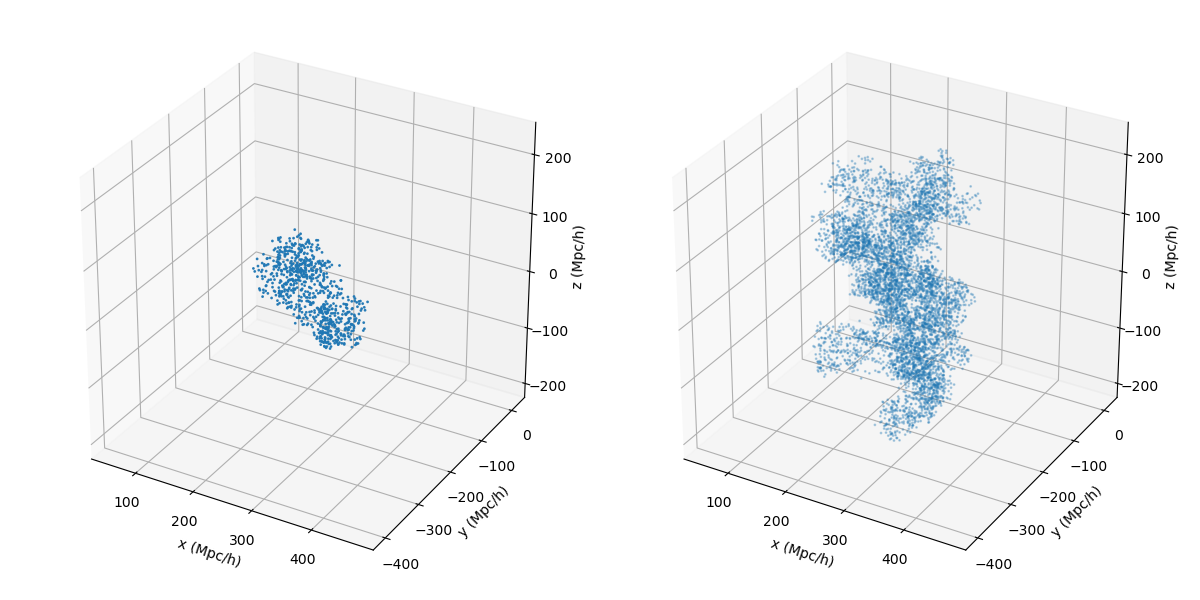

460.229750351475


In [11]:
fig = plt.figure( figsize=(12,6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection="3d")


ax1.scatter(x1,y1,z1, s=1, alpha=0.9)
#ax.scatter(x01, y01, z01)

ax2.scatter(x2,y2,z2, s=1, alpha=0.3)
#ax.scatter(x02, y02, z02)

x_max = np.max(list(x1) + list(x2))
x_min = np.min(list(x1) + list(x2))

y_max = np.max(list(y1) + list(y2))
y_min = np.min(list(y1) + list(y2))

z_max = np.max(list(z1) + list(z2))
z_min = np.min(list(z1) + list(z2))

L = np.max( [x_max - x_min, y_max - y_min, z_max - z_min])

print( L )

for ax in [ax1,ax2]:
    ax.set_xlim(x01 - L/2, x01 + L/2)
    ax.set_ylim(y01 - L/2, y01 + L/2)
    ax.set_zlim(z01 - L/2, z01 + L/2)
    ax.set_xlabel("x (Mpc/h)")
    ax.set_ylabel("y (Mpc/h)")
    ax.set_zlabel("z (Mpc/h)")

plt.show()

plt.tight_layout()
#plt.savefig("./figures/cocoa/08_big_voids.pdf")

fig = plt.figure( figsize=(12,6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection="3d")

ax1.plot_wireframe(Xt1, Yt1, Zt1,  rstride=4, cstride=4, color="green", linewidth=0.2 )
ax2.plot_wireframe(Xt2, Yt2, Zt2,  rstride=4, cstride=4, color="green", linewidth=0.2 )

ax1.scatter(x1,y1,z1, s=1, alpha=0.4)
ax1.set_title("(a)")

ax2.scatter(x2,y2,z2, s=1, alpha=0.3)
ax2.set_title("(b)")



for ax in [ax1,ax2]:
    ax.set_xlim(x01 - L/2, x01 + L/2)
    ax.set_ylim(y01 - L/2, y01 + L/2)
    ax.set_zlim(z01 - L/2, z01 + L/2)
    ax.set_xlabel("x (Mpc/h)")
    ax.set_ylabel("y (Mpc/h)")
    ax.set_zlabel("z (Mpc/h)")

plt.show()


plt.tight_layout()
plt.savefig("./figures/cocoa/09_big_voids-with-ellipsoid.pdf")

<IPython.core.display.Javascript object>


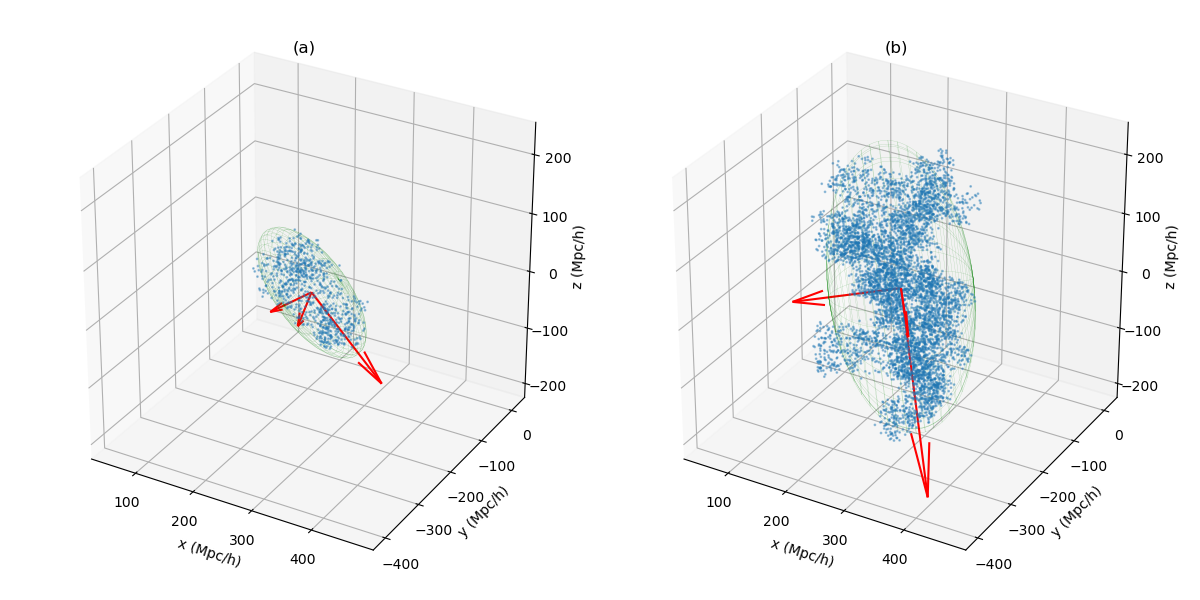

In [14]:
fig = plt.figure( figsize=(12,6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection="3d")

ax1.plot_wireframe(Xt1, Yt1, Zt1,  rstride=4, cstride=4, color="green", linewidth=0.2, alpha=0.3)
ax2.plot_wireframe(Xt2, Yt2, Zt2,  rstride=4, cstride=4, color="green", linewidth=0.2, alpha=0.3)

ax1.scatter(x1,y1,z1, s=1, alpha=0.4)
#ax.scatter(x01, y01, z01)
ax1.set_title("(a)")

Mult = 1.5

ax1.quiver(x01,y01,z01, a1_1,a2_1,a3_1, length= a_1*Mult, color="r")
ax1.quiver(x01,y01,z01, b1_1,b2_1,b3_1, length= b_1*Mult, color="r")
ax1.quiver(x01,y01,z01, c1_1,c2_1,c3_1, length= c_1*Mult, color="r")

ax2.scatter(x2,y2,z2, s=1, alpha=0.4)
#ax.scatter(x02, y02, z02)
ax2.set_title("(b)")
ax2.quiver(x02,y02,z02, a1_2,a2_2,a3_2, length= a_2*Mult, color="r")
ax2.quiver(x02,y02,z02, b1_2,b2_2,b3_2, length= b_2*Mult, color="r")
ax2.quiver(x02,y02,z02, c1_2,c2_2,c3_2, length= c_2*Mult, color="r")



for ax in [ax1,ax2]:
    ax.set_xlim(x01 - L/2, x01 + L/2)
    ax.set_ylim(y01 - L/2, y01 + L/2)
    ax.set_zlim(z01 - L/2, z01 + L/2)
    ax.set_xlabel("x (Mpc/h)")
    ax.set_ylabel("y (Mpc/h)")
    ax.set_zlabel("z (Mpc/h)")

plt.show()


plt.tight_layout()
plt.savefig("./figures/cocoa/09_big_voids-with-ellipsoid-vectors.pdf")